

### **Phần 1 : Đọc tập tin dữ liệu để Dự đoán giá bơ được bán ở Mỹ.**
1. Đọc tập tin dữ liệu avocado.csv 
2. Xem thông tin sơ bộ : shape/head/tail/info 
3. Kiểm tra dữ liệu bị trùng và xử lý 
4. Cho biết biến nào là biến input, biến nào là biến output. Xác định các biến số, các biến phân 
loại 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# 1. Đọc tập tin dữ liệu avocado.csv
data = pd.read_csv('avocado.csv')
data = data.drop('Unnamed: 0', axis=1)

In [3]:
# 2. Xem thông tin sơ bộ: shape/head/tail/info
data.shape

(18249, 13)

In [4]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
# Xem thông tin mô tả
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [8]:
# 3. Kiểm tra dữ liệu bị trùng và xử lý
duplicate_count = data.duplicated().sum()
print(f'* Số dòng duplicated: {duplicate_count}')

* Số dòng duplicated: 0


**4. Cho biết biến nào là biến input, biến nào là biến output. Xác định các biến số, các biến phân** 
> Biến Output: AveragePrice
>
> Biến Input: các biến còn lại (trừ AveragePrice)

In [9]:
# Xem type và unique value của tất cả các columns 
for col in data.columns:
    n = data[col].nunique()
    t = data[col].dtype
    print('* ',col,' - ', t, ' - ', n)
    if n <= 10:
        print('\t', data[col].unique())

*  Date  -  object  -  169
*  AveragePrice  -  float64  -  259
*  Total Volume  -  float64  -  18237
*  4046  -  float64  -  17702
*  4225  -  float64  -  18103
*  4770  -  float64  -  12071
*  Total Bags  -  float64  -  18097
*  Small Bags  -  float64  -  17321
*  Large Bags  -  float64  -  15082
*  XLarge Bags  -  float64  -  5588
*  type  -  object  -  2
	 ['conventional' 'organic']
*  year  -  int64  -  4
	 [2015 2016 2017 2018]
*  region  -  object  -  54


In [10]:
# Chuyển đổi type cho columns
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['year'].astype('str')

In [11]:
# Xác định các biến số.
numericals = [col for col in data.columns if (data[col].dtype == 'float64' or data[col].dtype == 'int64')]
print('* Xác định có {} biến numerical'.format(len(numericals)))
print('* Những biến numerical là :', numericals)

* Xác định có 9 biến numerical
* Những biến numerical là : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


In [12]:
# Xác định các biến phân loại
categorical = [col for col in data.columns if data[col].dtype == 'O']
print('* Xác định có {} biến categorical'.format(len(categorical)))
print('* Những biến categorical là :', categorical)

* Xác định có 3 biến categorical
* Những biến categorical là : ['type', 'year', 'region']


### **Phần 2 : Phân tích EDA** 
1. Kiểm tra dữ liệu bị thiếu và xử lý 
2. Phân tích 1 biến (cho nhận xét) 
3. Phân tích 2 biến (cho nhận xét) 
4. Kiểm tra và xóa các outlier

In [13]:
df1 = data.copy()

In [14]:
# 1. Kiểm tra dữ liệu bị thiếu và xử lý
df1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

> **Kết quả:** 
> 
> => KHÔNG có biến nào bị thiếu data.

#### 2. Phân Tích 1 Biến (Cho nhận xét)

In [15]:
from analysis.analyzer import TTTH_Analyzer as Analyzer

In [16]:
_analyzer = Analyzer()

In [17]:
## 2.1 Biến Categorical
df1[categorical].describe()

,type,year,region
count,18249,18249,18249
unique,2,4,54
top,conventional,2017,Albany
freq,9126,5722,338


Class count of type:

conventional    9126
organic         9123
Name: type, dtype: int64


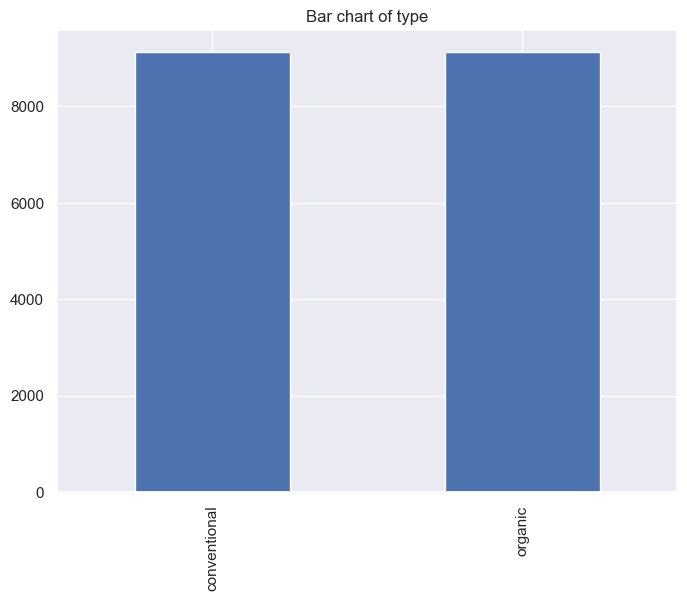

Class count of year:

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


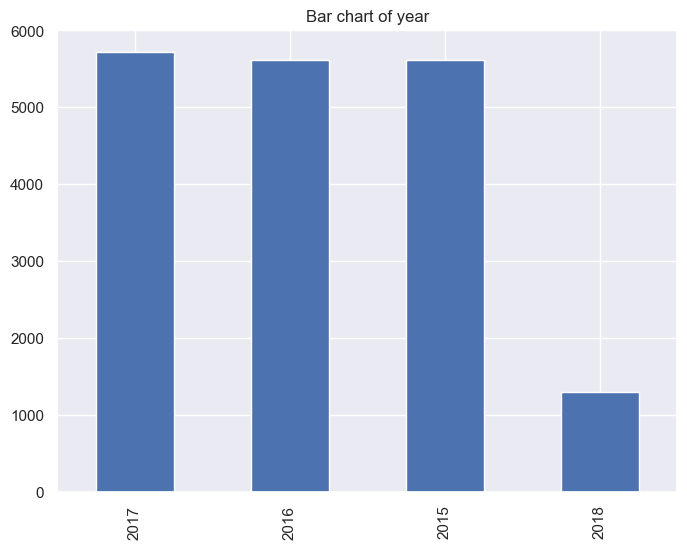

Class count of region:

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chic

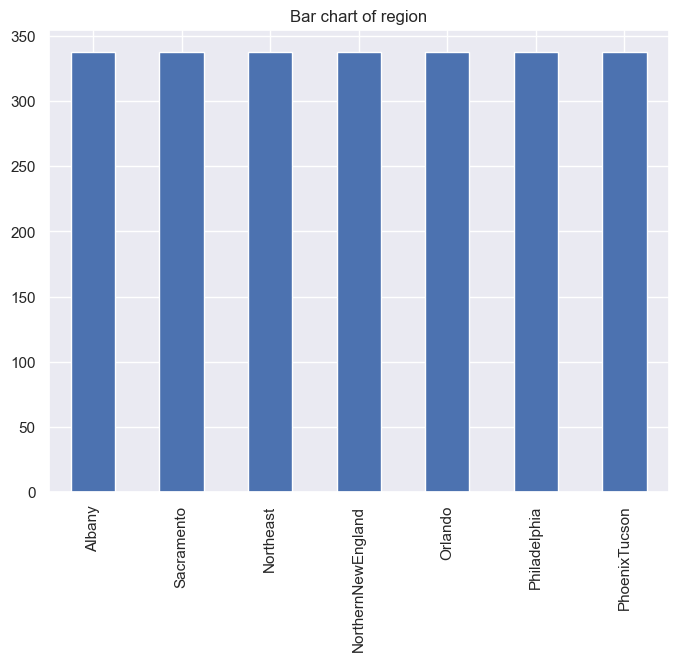

In [18]:
for col in categorical:
    _analyzer.analyze_category_variable(variable_name=col, df=df1)

##### <font color="red">Nhận Xét:</font>
> **- type**: Có 2 loại type "Conventional" và "Organic". Dựa vào biểu đồ, cả 2 loại này thì dữ liệu phân phối cân bằng hoàn hảo.
>
> **- region**: Có 54 regions được phân phối Bơ. Dựa vào dữ liệu và biểu đồ cho thấy các region phân phối cân bằng hoàn hảo.

In [19]:
## 2.2 Biến Numerical
df1[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


=====
central tendency of AveragePrice: {'mean': 1.405978409775878, 'median': 1.37, 'mode': 1.15, 'min': 0.44, 'max': 3.25, 'range': 2.81}
=====
Dispersion of AveragePrice: 
 {'range': 2.81, 'q1': 1.1, 'q3': 1.66, 'iqr': 0.5599999999999998, 'var': 0.1621484083457613, 'skew': 0.5803027378878419, 'kurtosis': 0.3251958506534338}
=====


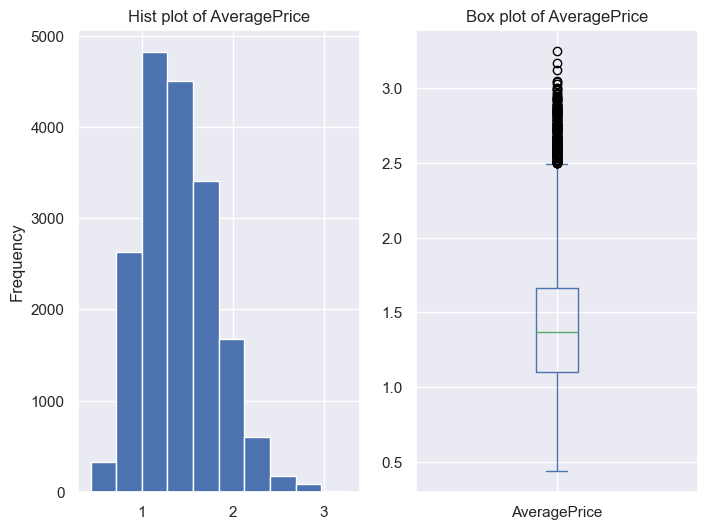

=====
central tendency of Total Volume: {'mean': 850644.0130089321, 'median': 107376.76, 'mode': 2038.99, 'min': 84.56, 'max': 62505646.52, 'range': 62505561.96}
=====
Dispersion of Total Volume: 
 {'range': 62505561.96, 'q1': 10838.58, 'q3': 432962.29, 'iqr': 422123.70999999996, 'var': 11926975521801.262, 'skew': 9.00768747885452, 'kurtosis': 92.10445777646086}
=====


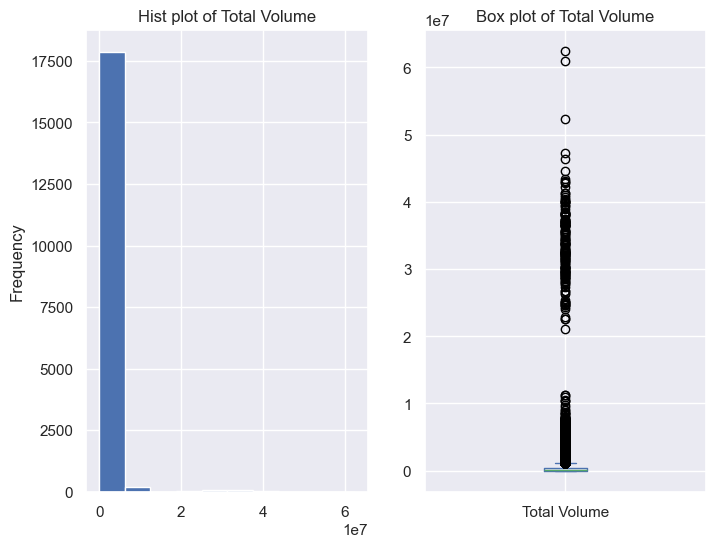

=====
central tendency of 4046: {'mean': 293008.4245306592, 'median': 8645.3, 'mode': 0.0, 'min': 0.0, 'max': 22743616.17, 'range': 22743616.17}
=====
Dispersion of 4046: 
 {'range': 22743616.17, 'q1': 854.07, 'q3': 111020.2, 'iqr': 110166.12999999999, 'var': 1600197376979.0344, 'skew': 8.648219757025226, 'kurtosis': 86.80911256453511}
=====


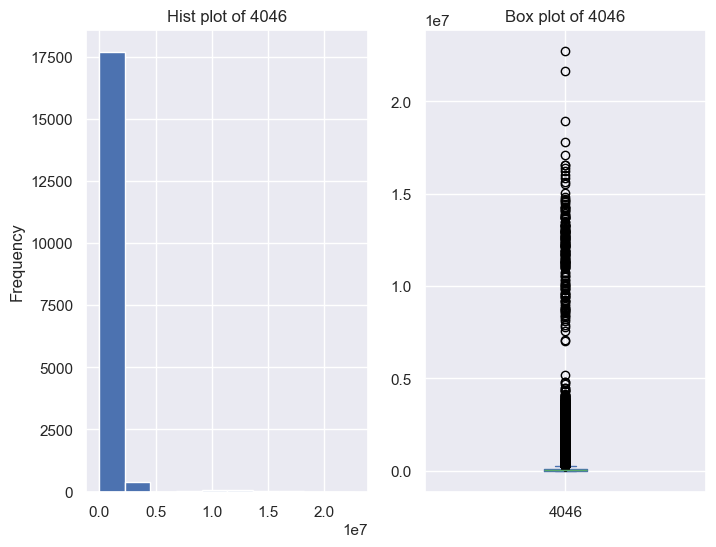

=====
central tendency of 4225: {'mean': 295154.56835607433, 'median': 29061.02, 'mode': 0.0, 'min': 0.0, 'max': 20470572.61, 'range': 20470572.61}
=====
Dispersion of 4225: 
 {'range': 20470572.61, 'q1': 3008.78, 'q3': 150206.86, 'iqr': 147198.08, 'var': 1449905940429.6353, 'skew': 8.942465607536276, 'kurtosis': 91.94902196597442}
=====


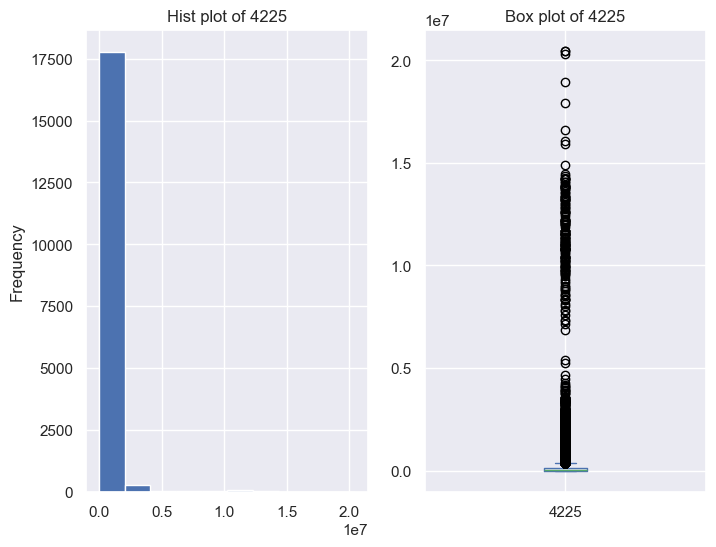

=====
central tendency of 4770: {'mean': 22839.73599265713, 'median': 184.99, 'mode': 0.0, 'min': 0.0, 'max': 2546439.11, 'range': 2546439.11}
=====
Dispersion of 4770: 
 {'range': 2546439.11, 'q1': 0.0, 'q3': 6243.42, 'iqr': 6243.42, 'var': 11548526004.682043, 'skew': 10.15939562715204, 'kurtosis': 132.5634408664653}
=====


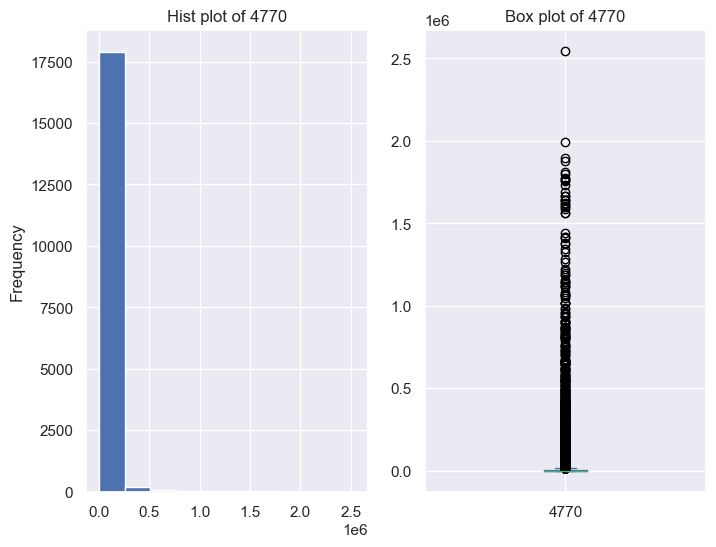

=====
central tendency of Total Bags: {'mean': 239639.20205983886, 'median': 39743.83, 'mode': 0.0, 'min': 0.0, 'max': 19373134.37, 'range': 19373134.37}
=====
Dispersion of Total Bags: 
 {'range': 19373134.37, 'q1': 5088.64, 'q3': 110783.37, 'iqr': 105694.73, 'var': 972674070012.1442, 'skew': 9.756071670300289, 'kurtosis': 112.27215647043404}
=====


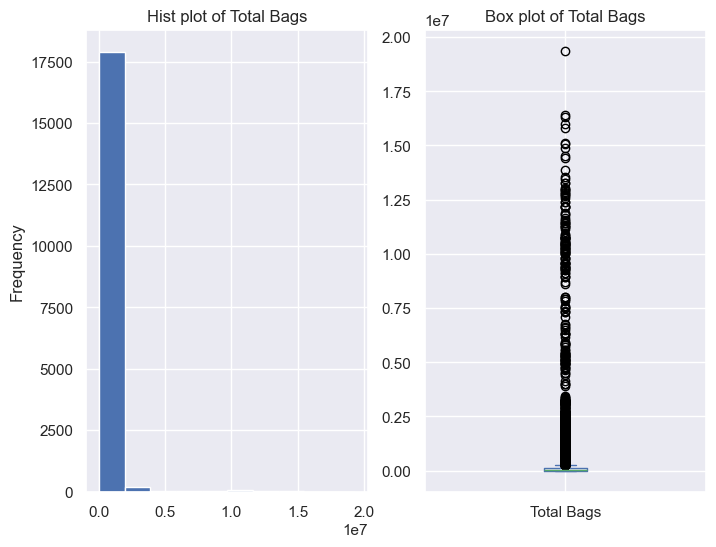

=====
central tendency of Small Bags: {'mean': 182194.68669570936, 'median': 26362.82, 'mode': 0.0, 'min': 0.0, 'max': 13384586.8, 'range': 13384586.8}
=====
Dispersion of Small Bags: 
 {'range': 13384586.8, 'q1': 2849.42, 'q3': 83337.67, 'iqr': 80488.25, 'var': 556782376190.5807, 'skew': 9.540659981758614, 'kurtosis': 107.01288512522609}
=====


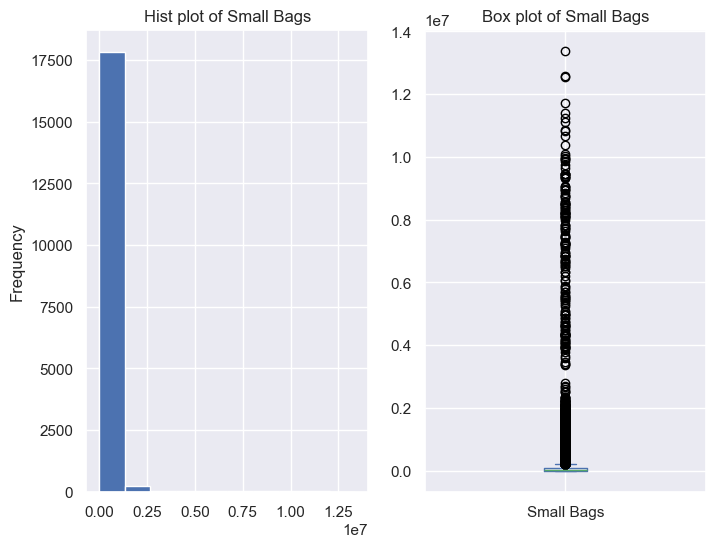

=====
central tendency of Large Bags: {'mean': 54338.08814455587, 'median': 2647.71, 'mode': 0.0, 'min': 0.0, 'max': 5719096.61, 'range': 5719096.61}
=====
Dispersion of Large Bags: 
 {'range': 5719096.61, 'q1': 127.47, 'q3': 22029.25, 'iqr': 21901.78, 'var': 59519391857.54754, 'skew': 9.796454598705258, 'kurtosis': 117.99948104584172}
=====


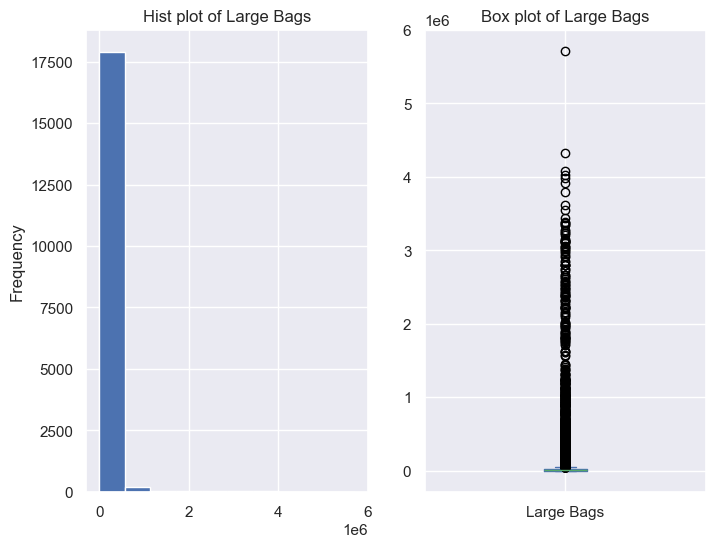

=====
central tendency of XLarge Bags: {'mean': 3106.426507205874, 'median': 0.0, 'mode': 0.0, 'min': 0.0, 'max': 551693.65, 'range': 551693.65}
=====
Dispersion of XLarge Bags: 
 {'range': 551693.65, 'q1': 0.0, 'q3': 132.5, 'iqr': 132.5, 'var': 313038521.16381496, 'skew': 13.13975068600658, 'kurtosis': 233.60261186166983}
=====


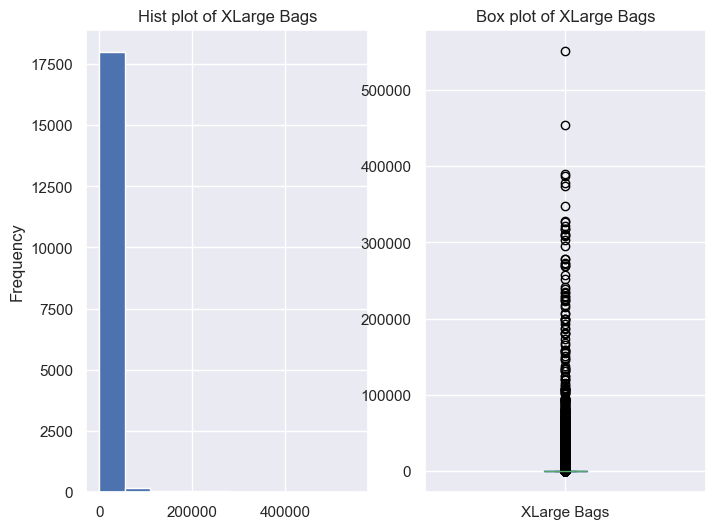

In [20]:
for col in numericals:
    _analyzer.analyze_numeric_variable(variable_name=col, df=df1)

##### <font color="red">Nhận Xét:</font>
> **- AveragePrice**: Dựa vào biểu đồ và dữ liệu, thì AveragePrice có tính chất phân phối chuẩn. Mean gần bằng nhau Median. Theo histogram thì hơi lệch phải (Skew > 0.5), vì do mean > median 1 chút.
>
> **- Các Features khác (ngoại trừ Year)**: Nhìn chung, theo histogram thì chủ yếu phân phối ở bin đầu tiên và bị ảnh hưởng bởi các outlier values. Theo dữ liệu thì Mean > Median rất nhiều.
>
> **- Year**: Dường như không thuộc biến Numerical.

#### 3. Phân Tích 2 Biến (Cho nhận xét)

In [21]:
## 3.1 Categorical và Categorical
n = len(categorical)
for i in range(n):
    for j in range(i+1, n): 
        print('* '*15)
        print('var_1 =', categorical[i], ",", "var_2 =", categorical[j])

        ## Sử dụng kiểm định giả thuyết - Kiểm định Chi-Square để phân tích.
        twoway_table = _analyzer.create_tw_table(var1=categorical[i], var2=categorical[j], df=data)
        print(_analyzer.use_chi_2_evaluation(twoway_table))

* * * * * * * * * * * * * * * 
var_1 = type , var_2 = year
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * 
var_1 = type , var_2 = region
Fail to reject H0 - Independent
* * * * * * * * * * * * * * * 
var_1 = year , var_2 = region
Fail to reject H0 - Independent


##### <font color="red">Nhận Xét:</font>
> * Dựa vào kết quả kiểm định, **reject H0 thất bại** 
> 
>   * 2 biến 'type' và 'region' là 2 biến độc lập.
>
>   * 2 biến 'type' và 'year' là 2 biến độc lập
>
>   * 2 biến 'region' và 'year' là 2 biến độc lập


In [22]:
import scipy.stats as stats

In [23]:
def analyze_continous_vs_continous(var_1, var_2, df):
    # Calculate Pearson correlation coefficient
    correlation_coefficient, p_value = stats.pearsonr(df[var_1], df[var_2])
    print('var 1=',var_1,',','var 2=',var_2)
    print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f} - P-value: {p_value:.4f}")
    sns.scatterplot(data=df, x=var_1, y=var_2)
    plt.show()

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= Total Volume
Pearson Correlation Coefficient: -0.19 - P-value: 0.0000


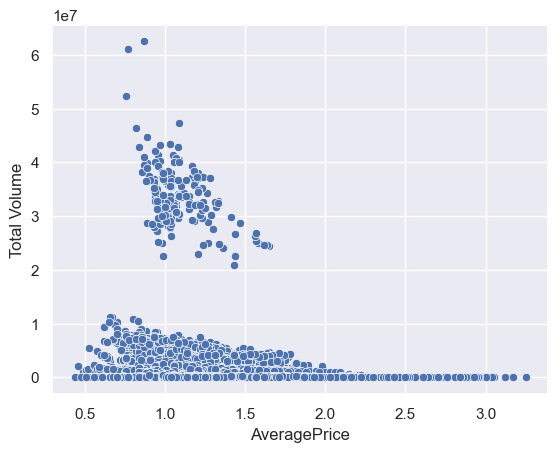

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= 4046
Pearson Correlation Coefficient: -0.21 - P-value: 0.0000


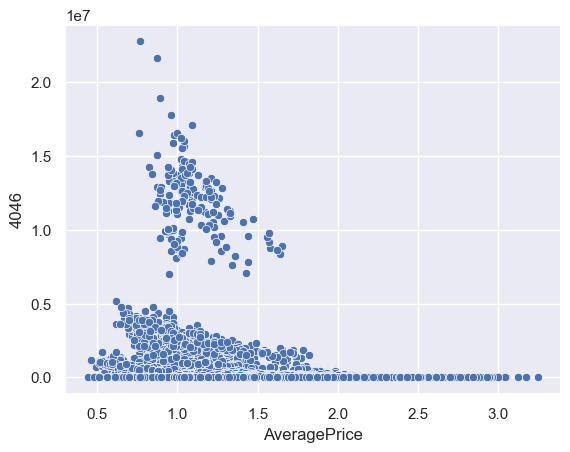

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= 4225
Pearson Correlation Coefficient: -0.17 - P-value: 0.0000


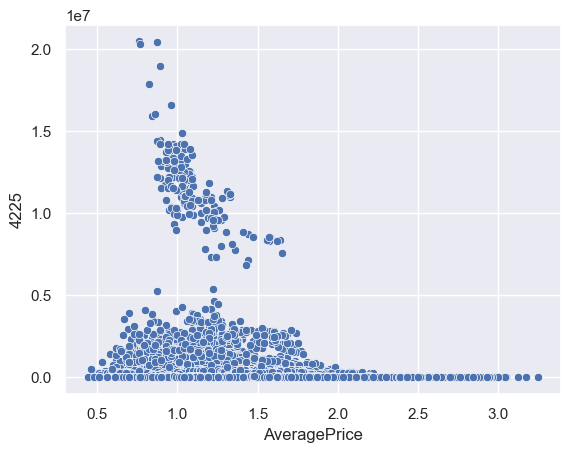

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= 4770
Pearson Correlation Coefficient: -0.18 - P-value: 0.0000


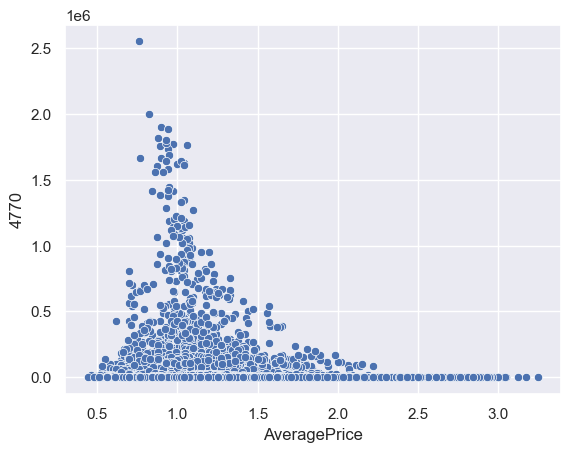

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= Total Bags
Pearson Correlation Coefficient: -0.18 - P-value: 0.0000


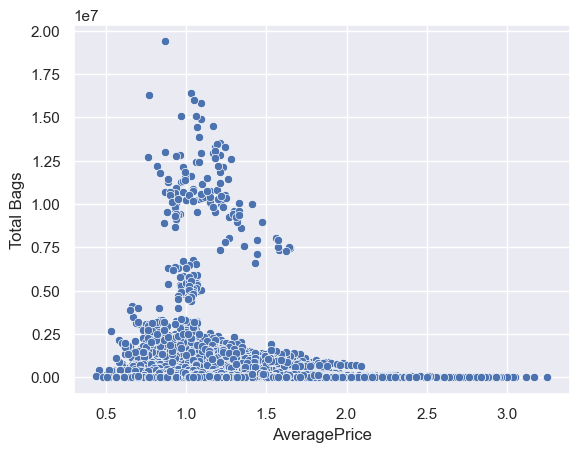

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= Small Bags
Pearson Correlation Coefficient: -0.17 - P-value: 0.0000


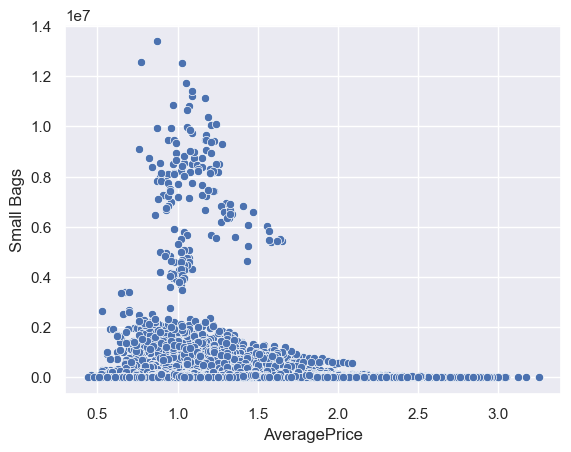

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= Large Bags
Pearson Correlation Coefficient: -0.17 - P-value: 0.0000


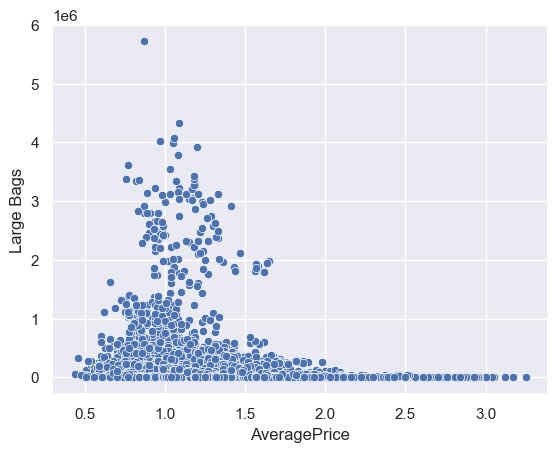

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= AveragePrice , var 2= XLarge Bags
Pearson Correlation Coefficient: -0.12 - P-value: 0.0000


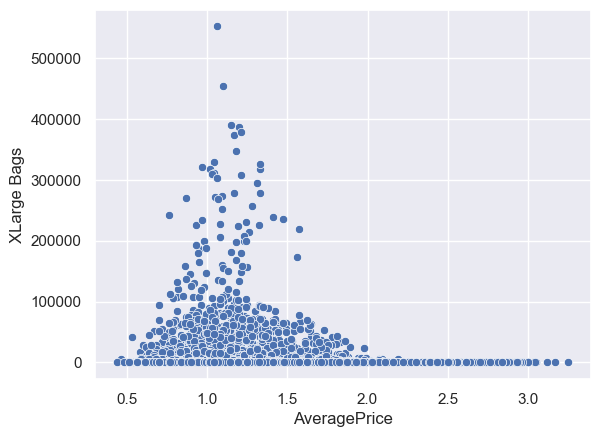

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= 4046
Pearson Correlation Coefficient: 0.98 - P-value: 0.0000


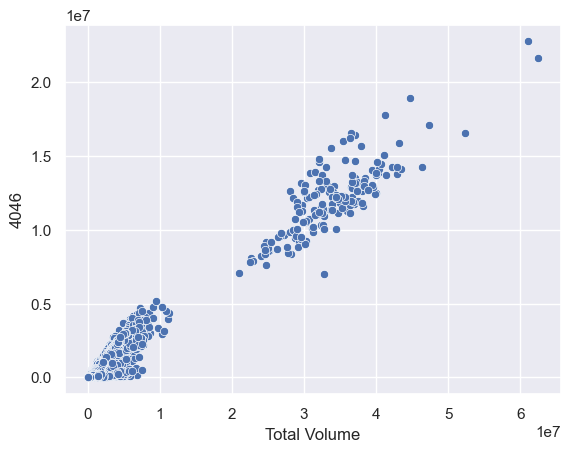

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= 4225
Pearson Correlation Coefficient: 0.97 - P-value: 0.0000


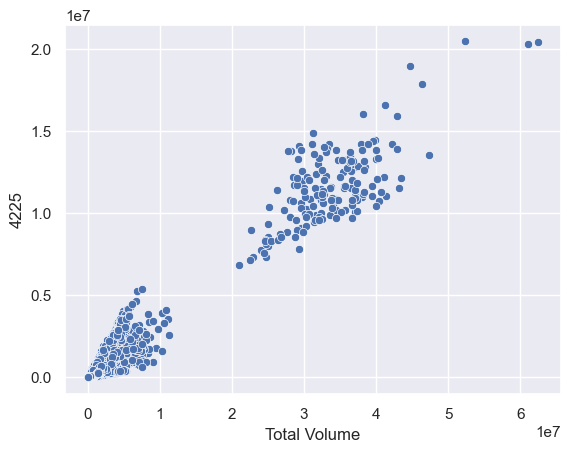

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= 4770
Pearson Correlation Coefficient: 0.87 - P-value: 0.0000


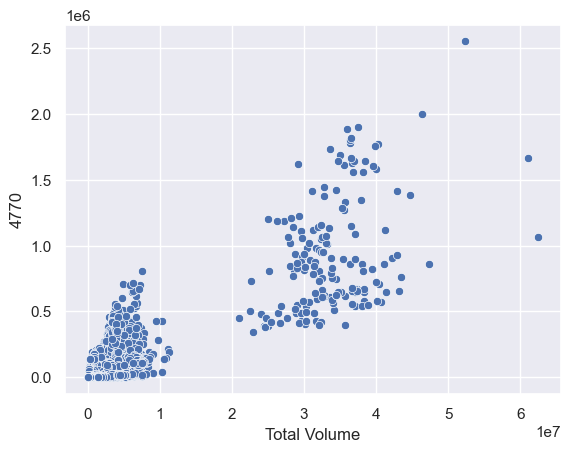

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= Total Bags
Pearson Correlation Coefficient: 0.96 - P-value: 0.0000


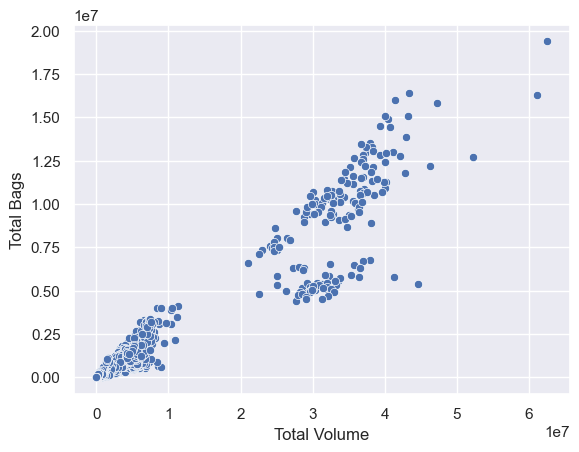

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= Small Bags
Pearson Correlation Coefficient: 0.97 - P-value: 0.0000


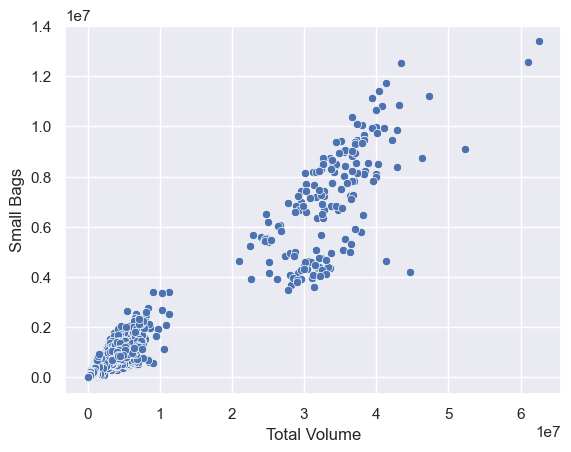

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= Large Bags
Pearson Correlation Coefficient: 0.88 - P-value: 0.0000


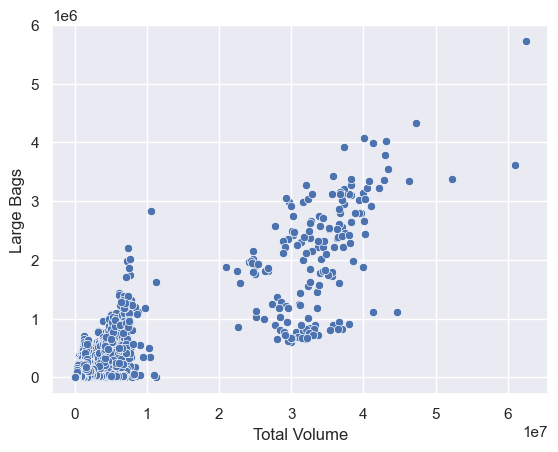

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Volume , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.75 - P-value: 0.0000


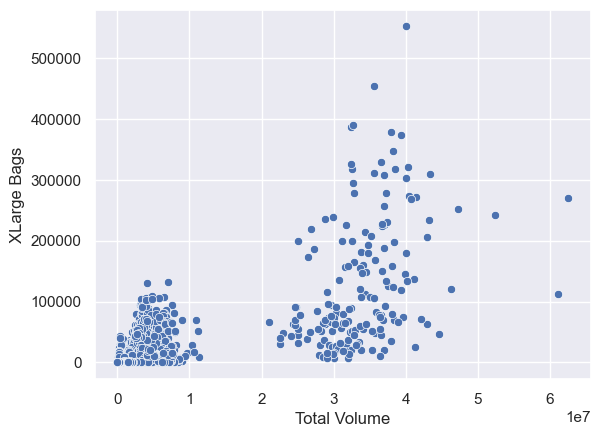

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= 4225
Pearson Correlation Coefficient: 0.93 - P-value: 0.0000


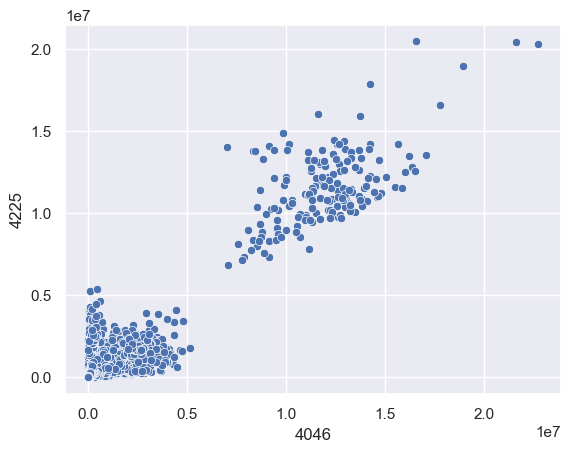

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= 4770
Pearson Correlation Coefficient: 0.83 - P-value: 0.0000


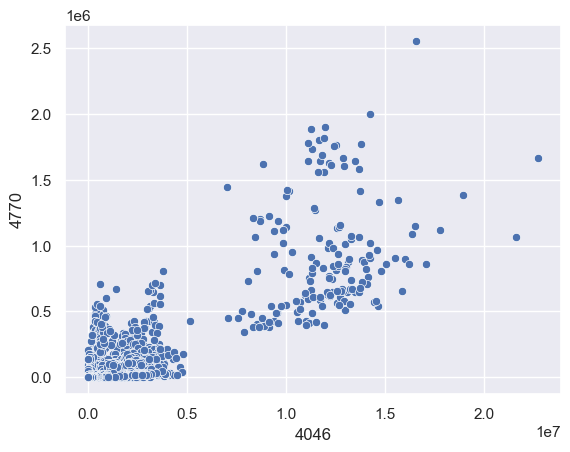

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= Total Bags
Pearson Correlation Coefficient: 0.92 - P-value: 0.0000


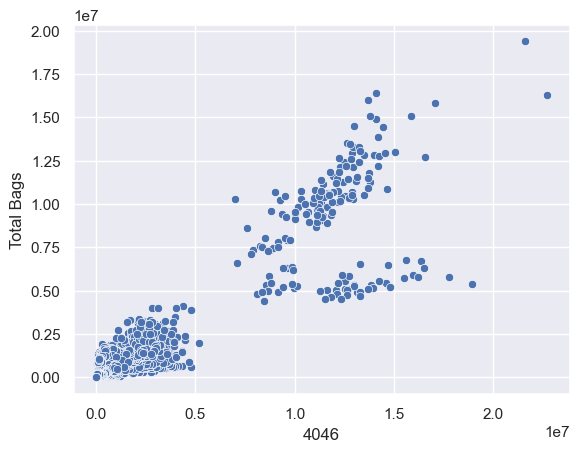

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= Small Bags
Pearson Correlation Coefficient: 0.93 - P-value: 0.0000


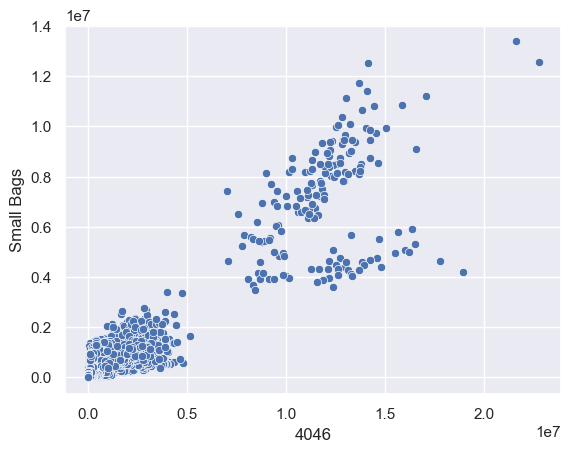

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= Large Bags
Pearson Correlation Coefficient: 0.84 - P-value: 0.0000


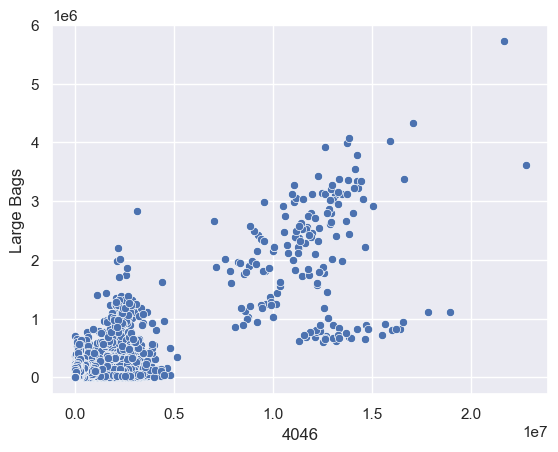

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4046 , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.70 - P-value: 0.0000


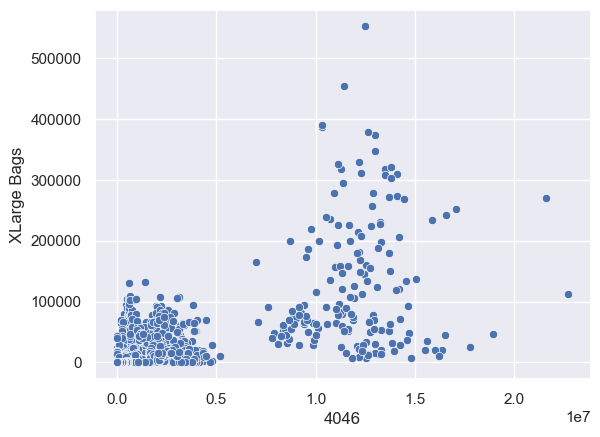

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4225 , var 2= 4770
Pearson Correlation Coefficient: 0.89 - P-value: 0.0000


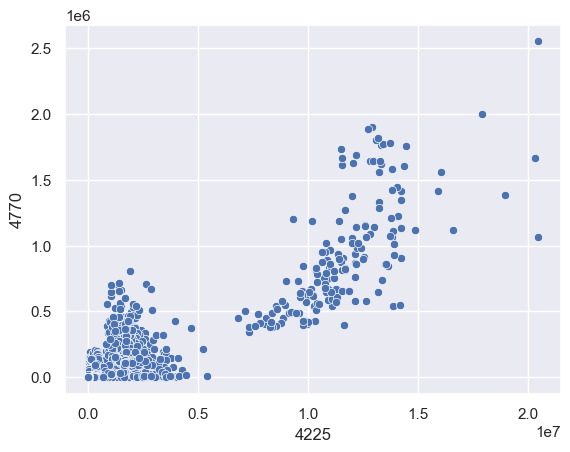

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4225 , var 2= Total Bags
Pearson Correlation Coefficient: 0.91 - P-value: 0.0000


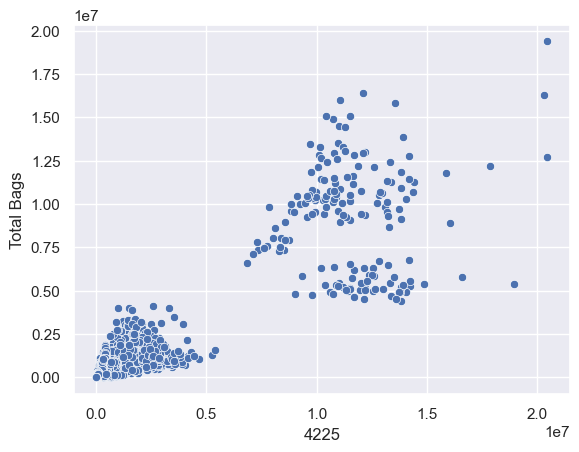

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4225 , var 2= Small Bags
Pearson Correlation Coefficient: 0.92 - P-value: 0.0000


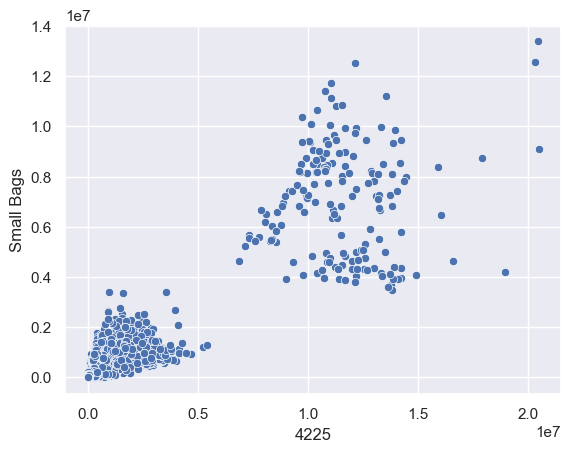

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4225 , var 2= Large Bags
Pearson Correlation Coefficient: 0.81 - P-value: 0.0000


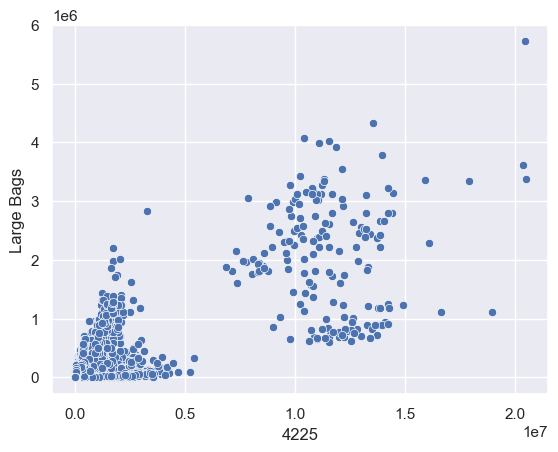

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4225 , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.69 - P-value: 0.0000


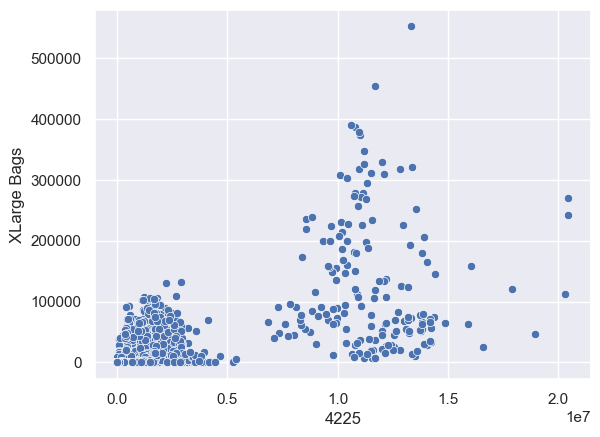

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4770 , var 2= Total Bags
Pearson Correlation Coefficient: 0.79 - P-value: 0.0000


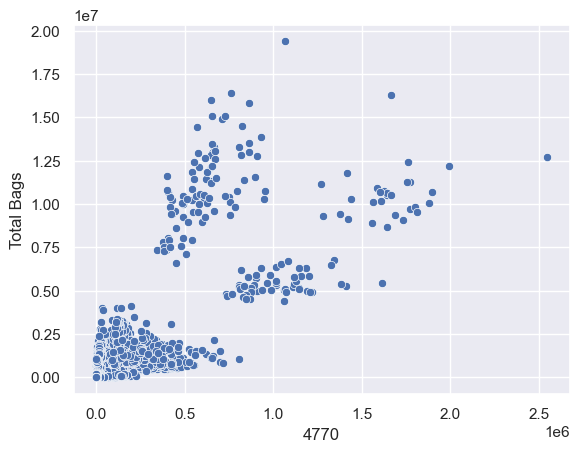

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4770 , var 2= Small Bags
Pearson Correlation Coefficient: 0.80 - P-value: 0.0000


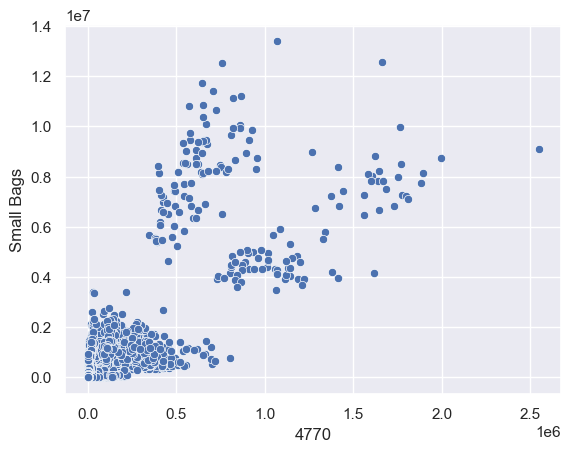

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4770 , var 2= Large Bags
Pearson Correlation Coefficient: 0.70 - P-value: 0.0000


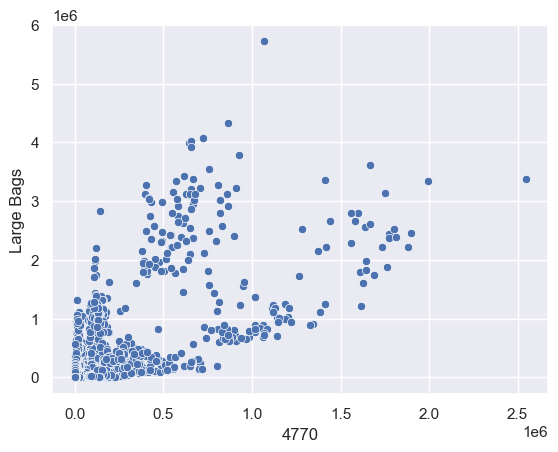

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= 4770 , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.68 - P-value: 0.0000


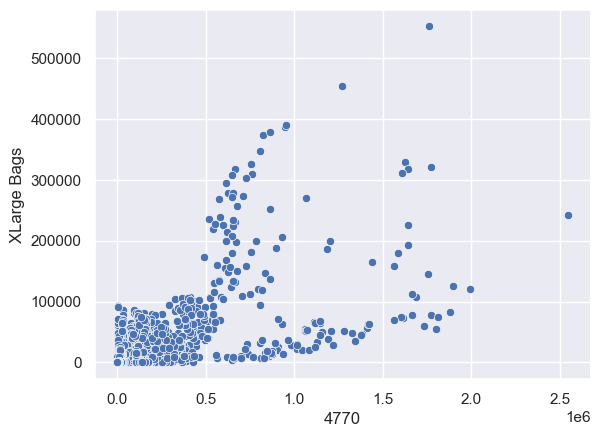

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Bags , var 2= Small Bags
Pearson Correlation Coefficient: 0.99 - P-value: 0.0000


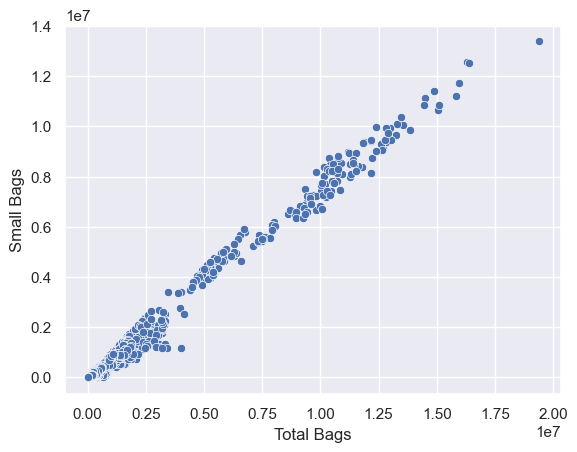

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Bags , var 2= Large Bags
Pearson Correlation Coefficient: 0.94 - P-value: 0.0000


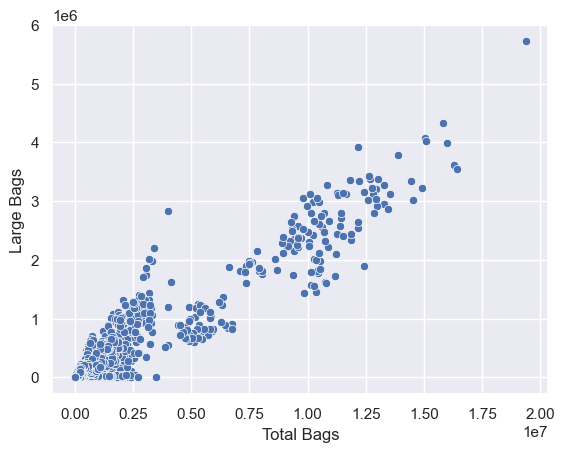

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Total Bags , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.80 - P-value: 0.0000


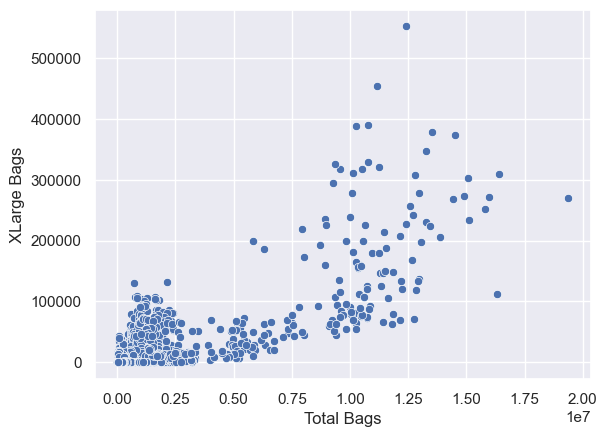

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Small Bags , var 2= Large Bags
Pearson Correlation Coefficient: 0.90 - P-value: 0.0000


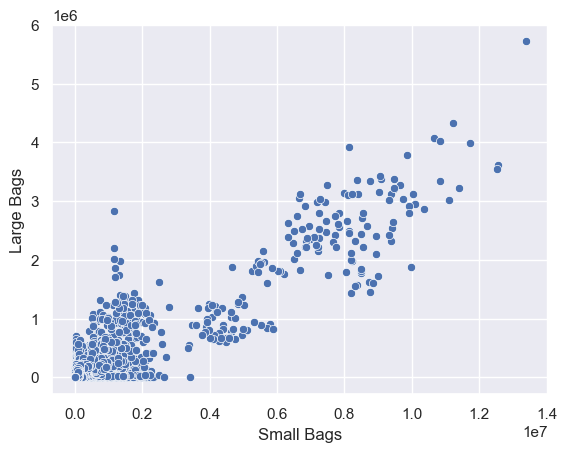

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Small Bags , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.81 - P-value: 0.0000


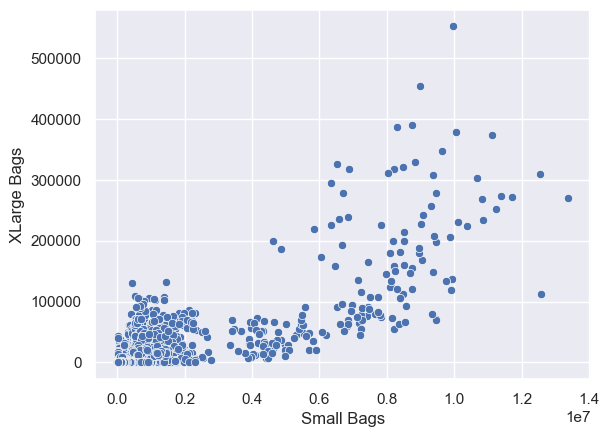

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
var 1= Large Bags , var 2= XLarge Bags
Pearson Correlation Coefficient: 0.71 - P-value: 0.0000


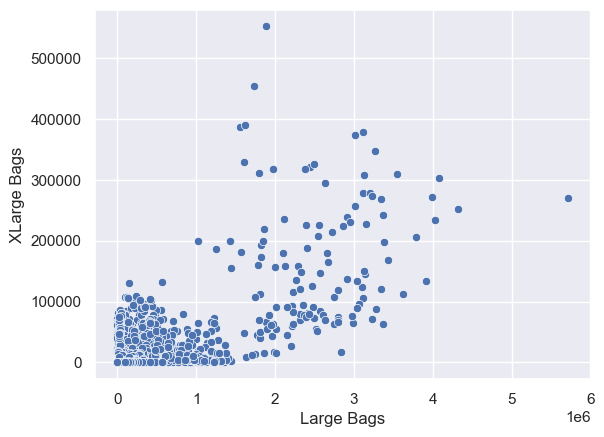

In [24]:
## 3.2 Numerical và Numerical
n = len(numericals)
for i in range(n):
    for j in range(i+1, n):
        print('* '*40)
        analyze_continous_vs_continous(var_1=numericals[i], var_2=numericals[j], df=data)

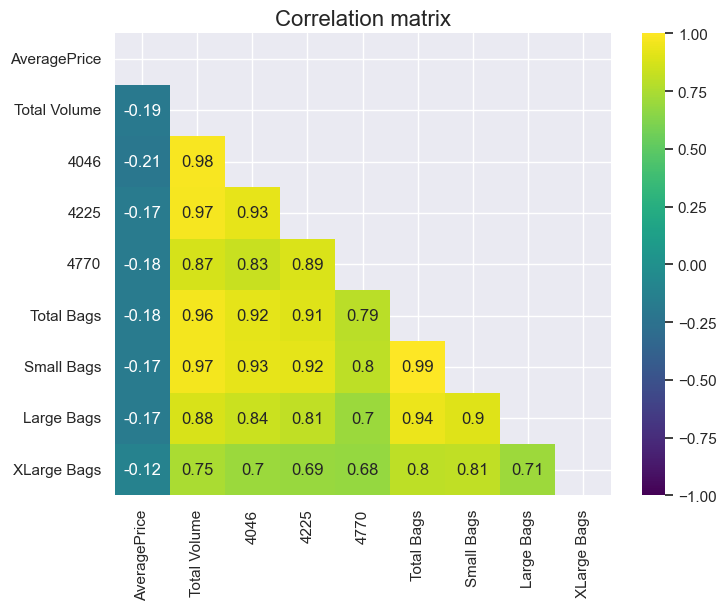

In [25]:
# Tạo correlation matrix để dễ quan sát.
corr = data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.2g', annot=True, mask = matrix, cmap='viridis')

plt.title('Correlation matrix', size=16)
plt.show()

##### <font color="red">Nhận Xét:</font>
> Dựa vào biểu đồ:
> - AveragePrice tương quan nghịch, rất yếu với các biến khác. Giá trị Correlation đo được trong [-0.21, -0.12]
> 
> - Total Volume tương quan thuận mạnh với các biến trong nhóm Product Look Up (PLU) và nhóm Bags. Giá trị Correlation đo được trong [0.75, 0.98]
> - Các biến trong nhóm PLU có tương quan thuận mạnh với các biến trong nhóm Bag (Correlation > 0.7). 
> 
> - Tuy nhiên, cặp biến '4770' vs 'XLarge Bags', tương quan yếu. Giá trị Correlation < 0.7.
> 
> - Trong nội bộ nhóm các biến PLU và nhóm các biến Bags, tương quan giữa các biến số cũng mạnh.  


In [26]:
## 3.3 Numerical và Categorical
## Phân tích biến 'AveragePrice' và Categorical
## Dùng kiểm định ANOVA để phân tích.
_analyzer.analyze_anova_table_for_continous_vs_categories(continous_var='AveragePrice', category_vars=['type', 'year'], df=data)

                      sum_sq       df             F         PR(>F)
C(type)          1122.294219      1.0  11952.219924   0.000000e+00
C(year)           103.340697      3.0    366.852920  2.286246e-231
C(type):C(year)    20.541911      3.0     72.922483   7.066319e-47
Residual         1712.800549  18241.0           NaN            NaN


##### <font color="red">Nhận Xét:</font>
> Dựa vào kết quả kiểm định: (alpha = 0.05)
> - Có sự khác biệt về giá trung bình, giữa AveragePrice và type (p-value < alpha)
>
> - Tương tự, có sự khác biệt về giá trung bình, giữa AveragePrice và year.
>
> - Sự kết hợp giữa type và year cũng có sự khác biệt giá trung bình


In [27]:
# Rename 1 tên 1 số column.
df1.rename(columns={'Total Volume':'Total_Volume',
                     '4046': 'PLU_4046',
                     '4225': 'PLU_4225',
                     '4770': 'PLU_4770',
                     'Total Bags': 'Total_Bags', 'Small Bags': 'Small_Bags',
                     'Large Bags': 'Large_Bags', 'XLarge Bags': 'XLarge_Bags'}, 
            inplace=True)

In [28]:
numericals = df1.select_dtypes('number').columns
numericals

Index(['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags'],
      dtype='object')

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: Total_Volume
                       sum_sq       df            F         PR(>F)
C(type)          1.175843e+16      1.0  1042.542509  1.787742e-222
C(year)          8.903484e+13      3.0     2.631378   4.828335e-02
C(type):C(year)  6.298524e+13      3.0     1.861496   1.337123e-01
Residual         2.057331e+17  18241.0          NaN            NaN


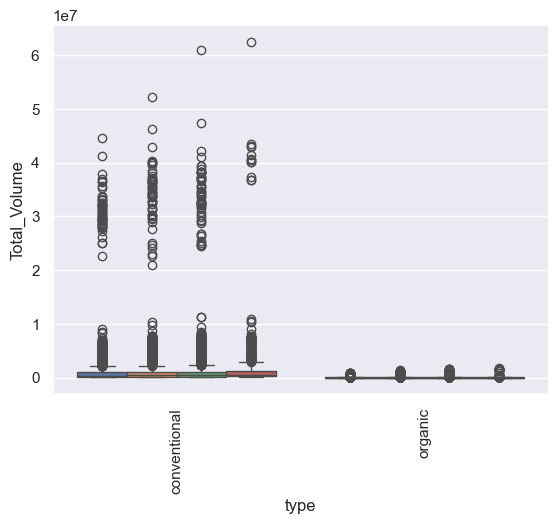

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: PLU_4046
                       sum_sq       df           F         PR(>F)
C(type)          1.489044e+15      1.0  980.749153  9.507012e-210
C(year)          8.452405e+12      3.0    1.855707   1.347193e-01
C(type):C(year)  8.098463e+12      3.0    1.778000   1.489520e-01
Residual         2.769480e+16  18241.0         NaN            NaN


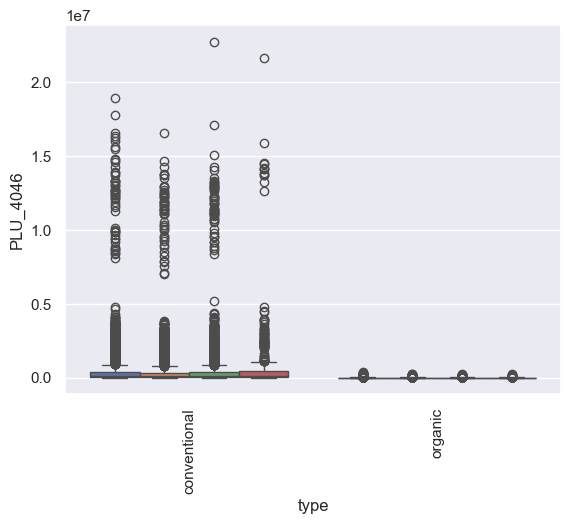

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: PLU_4225
                       sum_sq       df            F         PR(>F)
C(type)          1.427642e+15      1.0  1040.921629  3.851044e-222
C(year)          6.098559e+12      3.0     1.482193   2.171434e-01
C(type):C(year)  6.316608e+12      3.0     1.535187   2.031044e-01
Residual         2.501784e+16  18241.0          NaN            NaN


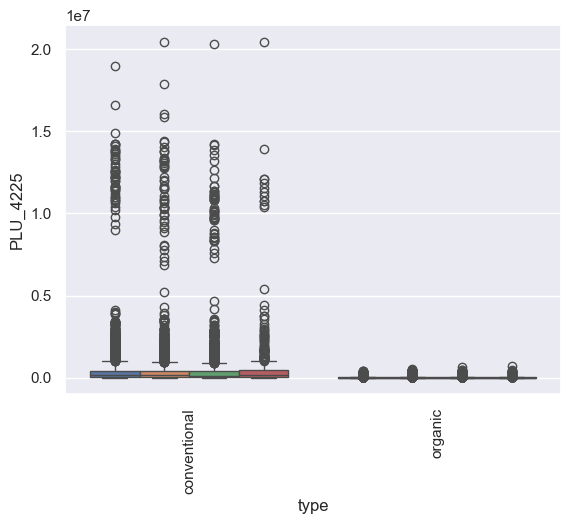

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: PLU_4770
                       sum_sq       df           F         PR(>F)
C(type)          9.296447e+12      1.0  846.114849  7.078159e-182
C(year)          5.226176e+11      3.0   15.855322   2.713459e-10
C(type):C(year)  5.011196e+11      3.0   15.203111   7.056495e-10
Residual         2.004178e+14  18241.0         NaN            NaN


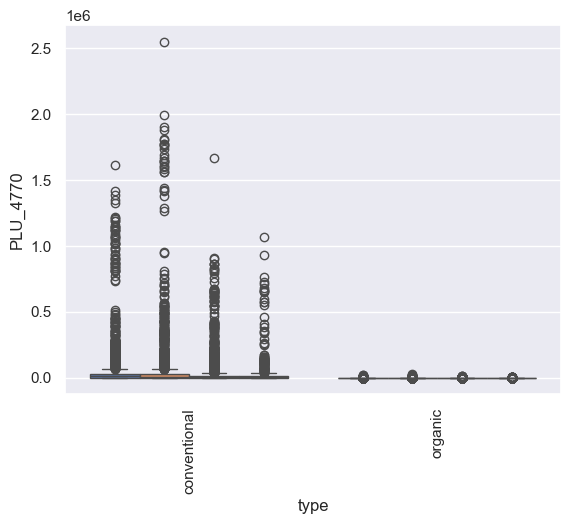

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: Total_Bags
                       sum_sq       df           F         PR(>F)
C(type)          8.418860e+14      1.0  917.419989  1.157274e-196
C(year)          9.949794e+13      3.0   36.141631   2.803610e-23
C(type):C(year)  6.881201e+13      3.0   24.995275   3.932312e-16
Residual         1.673916e+16  18241.0         NaN            NaN


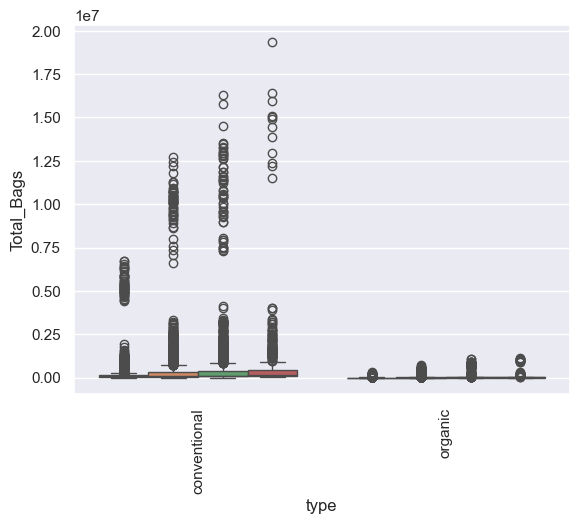

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: Small_Bags
                       sum_sq       df           F         PR(>F)
C(type)          4.941497e+14      1.0  939.859291  2.641603e-201
C(year)          4.576765e+13      3.0   29.016276   1.042936e-18
C(type):C(year)  2.968049e+13      3.0   18.817163   3.509670e-12
Residual         9.590569e+15  18241.0         NaN            NaN


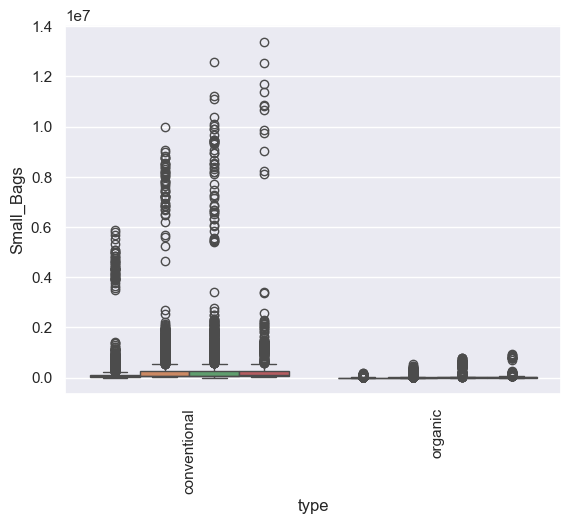

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: Large_Bags
                       sum_sq       df           F         PR(>F)
C(type)          4.053080e+13      1.0  718.180401  3.330151e-155
C(year)          9.055949e+12      3.0   53.488585   2.056382e-34
C(type):C(year)  7.084943e+12      3.0   41.846920   6.107044e-27
Residual         1.029438e+15  18241.0         NaN            NaN


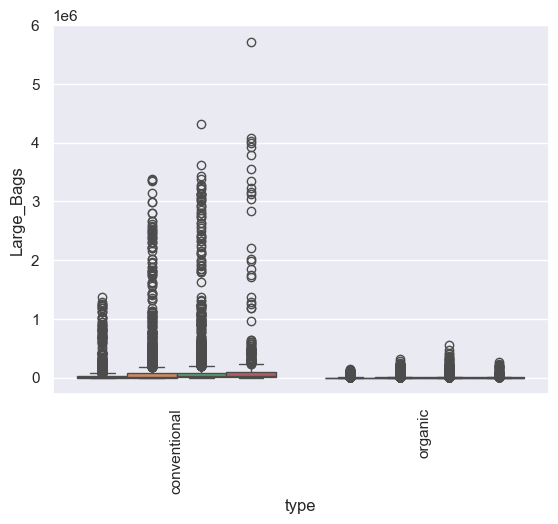

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Numerical feature: XLarge_Bags
                       sum_sq       df           F         PR(>F)
C(type)          1.759070e+11      1.0  588.362081  6.015473e-128
C(year)          4.143170e+10      3.0   46.192672   9.911915e-30
C(type):C(year)  4.134080e+10      3.0   46.091327   1.151366e-29
Residual         5.453647e+12  18241.0         NaN            NaN


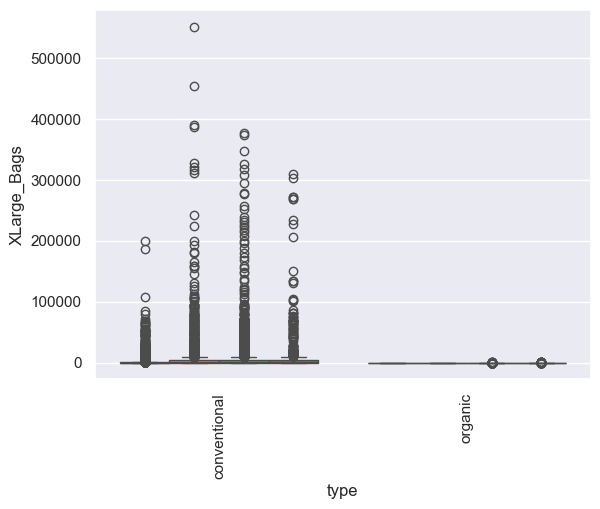

In [29]:
for col in numericals[1:]:
    print('* '*40)
    print(f'Numerical feature: {col}')
    _analyzer.analyze_continous_vs_categories(continous_var=col, category_vars=['type', 'year'], df=df1)

##### <font color="red">Nhận Xét:</font>
> Dựa vào kết quả kiểm định: (alpha = 0.05)
>
> - Có sự khác biệt có ý nghĩa về thống kê, giữa các biến numerial và type (p-value < alpha)
>
> - Tương tự, Có sự khác biệt có ý nghĩa về thống kê, giữa các biến numerial và year.
>
> - Sự kết hợp giữa type và year cũng có sự khác biệt với biến numerical.

In [30]:
## 3.4 Kiểm tra và xóa các outliers
def remove_outliers(col_name, df, threshold=1.5):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers_values = (df[col_name] < lower_bound) | (df[col_name] > upper_bound)

    print(f'Số lượng outliers in {col_name}: {outliers_values.sum()}')
    
    return df[~outliers_values]

In [31]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=1, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i], color='green')
    
    fig.tight_layout(h_pad = 2,w_pad = 5)

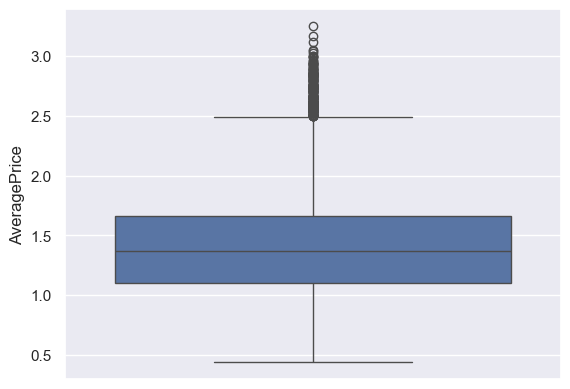

In [32]:
# Check outlier của biến AveragePice trước khi remove Outliers
sns.boxplot(data=df1, y='AveragePrice')
plt.show()

In [33]:
df1 = remove_outliers(col_name='AveragePrice', df=df1)

Số lượng outliers in AveragePrice: 209


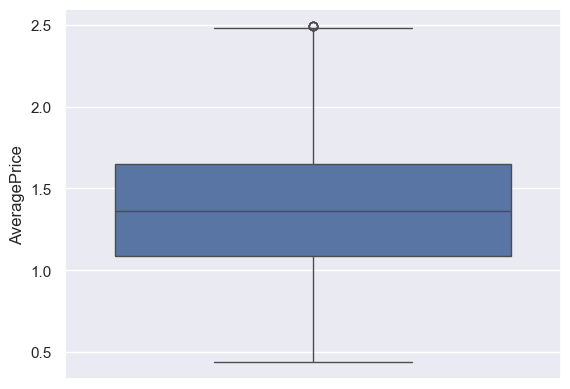

In [34]:
sns.boxplot(data=df1, y='AveragePrice')
plt.show()

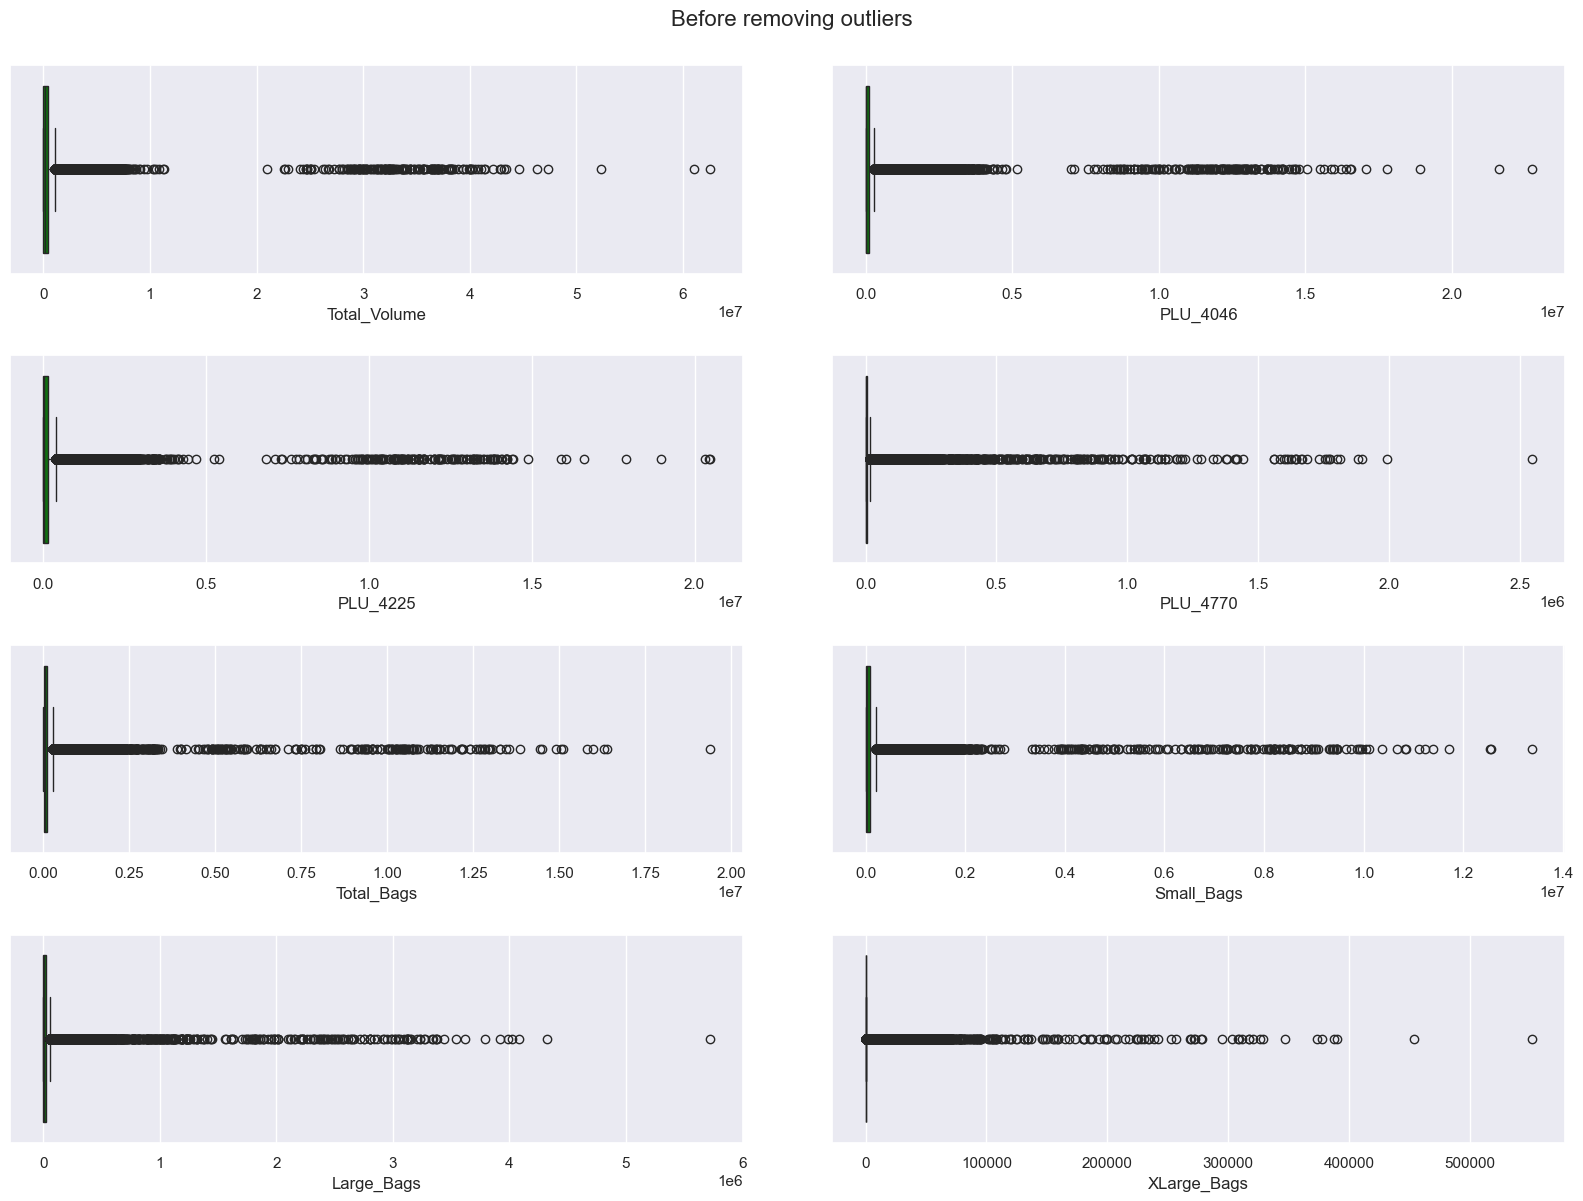

In [35]:
# Xem trước Outlier value của các biến input numerical.
boxplots_custom(df1, numericals[1:], rows=4, cols=2, suptitle="Before removing outliers")

In [36]:
for col in numericals[1:]:
    df1 = remove_outliers(col_name=col, df=df1)

Số lượng outliers in Total_Volume: 2270
Số lượng outliers in PLU_4046: 1737
Số lượng outliers in PLU_4225: 1653
Số lượng outliers in PLU_4770: 2309
Số lượng outliers in Total_Bags: 1194
Số lượng outliers in Small_Bags: 978
Số lượng outliers in Large_Bags: 1088
Số lượng outliers in XLarge_Bags: 86


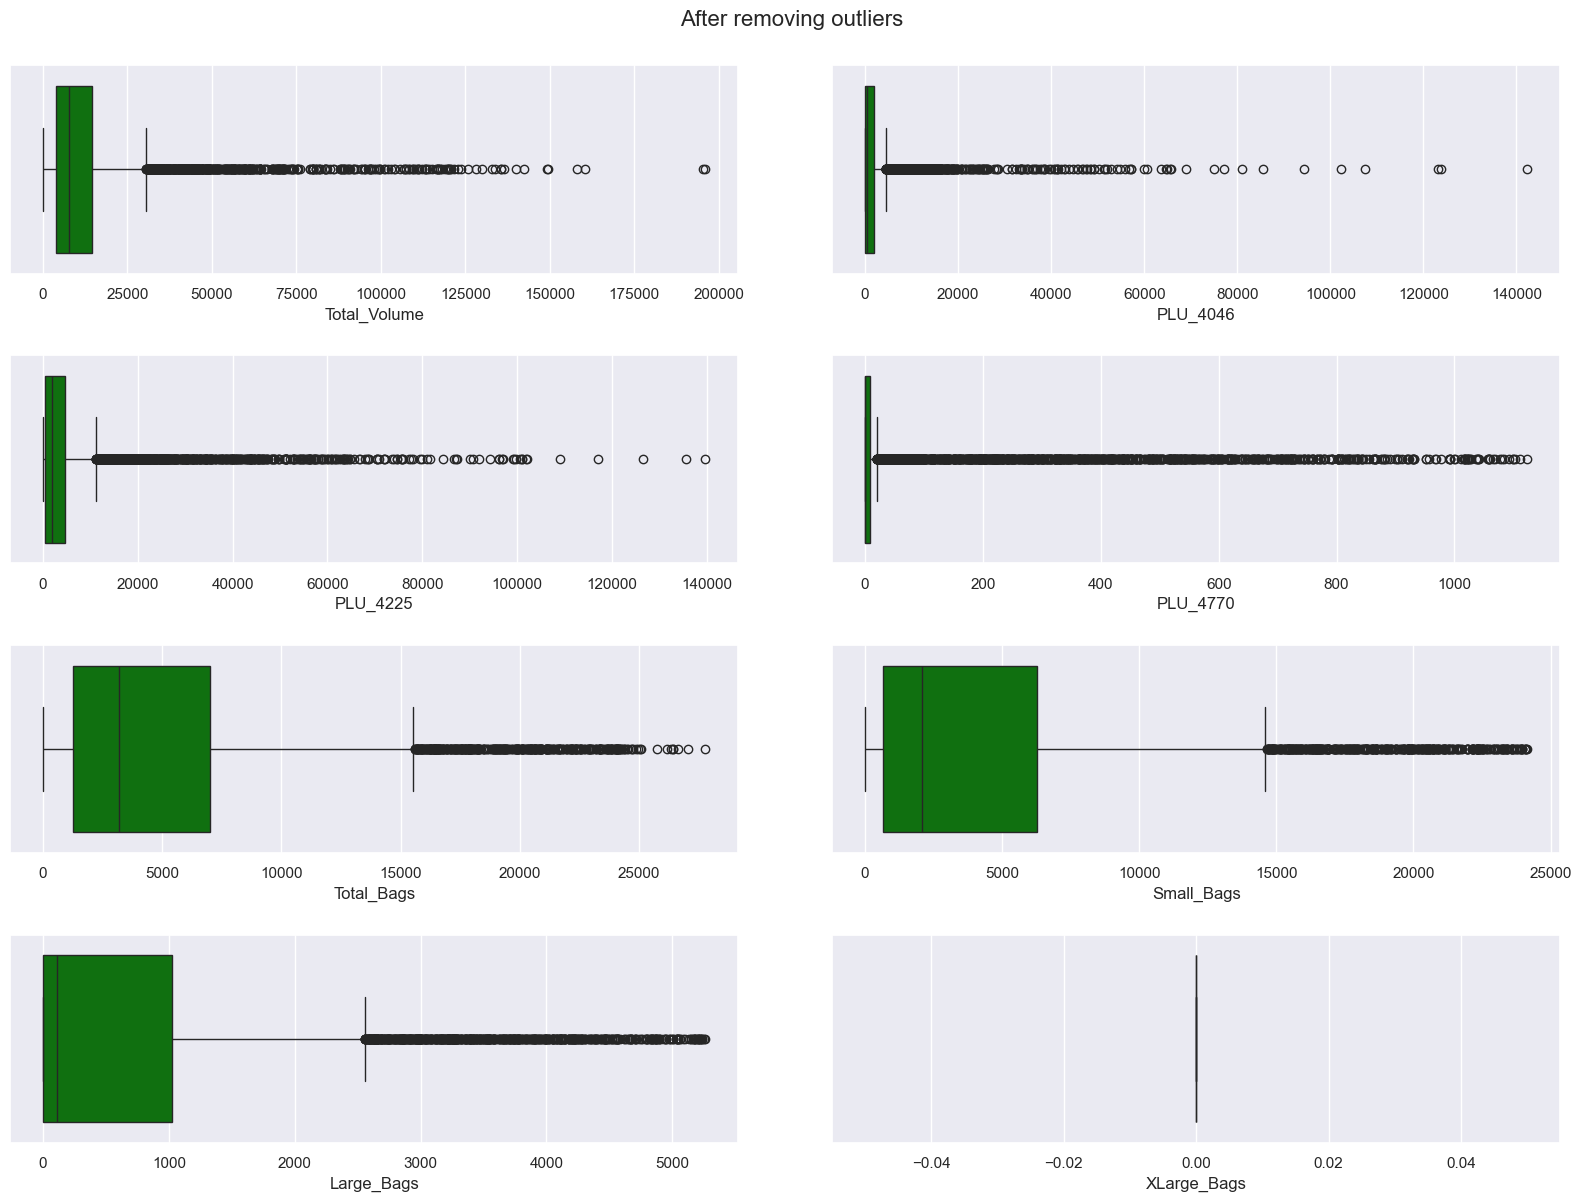

In [37]:
boxplots_custom(df1, numericals[1:], rows=4, cols=2, suptitle="After removing outliers")

In [38]:
data.shape

(18249, 13)

### **Phần 3 : Feature Engineering** 
1. Chuẩn hóa các biến phân loại input 
2. Chuẩn hóa các biến số input 

In [39]:
df2 = df1.copy()
df2.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [40]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [41]:
# 4.1 Chuẩn hóa các biến phân loại input
df2[categorical].describe()

,type,year,region
count,6725,6725,6725
unique,2,4,52
top,organic,2015,Albany
freq,6550,2485,257


In [42]:
df2 = pd.get_dummies(df2, columns=['type', 'region', 'year'])
df2.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,...,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico,year_2015,year_2016,year_2017,year_2018
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# 4.2 Chuẩn hóa các biến số input.
df2[numericals[1:]].head()

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [44]:
## Dùng Standard Scaler
standar_scaler = StandardScaler()
df2[numericals[1:]] = standar_scaler.fit_transform(df2[numericals[1:]])
df2

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,...,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico,year_2015,year_2016,year_2017,year_2018
0,2015-12-27,1.33,2.937716,-0.204192,4.135944,-0.082872,0.708077,0.840686,-0.553199,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2015-12-20,1.35,2.400315,-0.257605,3.305321,-0.025287,0.863326,0.997231,-0.549486,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2015-12-13,0.93,6.037282,-0.239860,8.764163,0.383353,0.602198,0.731437,-0.544538,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2015-12-06,1.08,3.784931,-0.190154,5.618600,0.055399,0.154089,0.271249,-0.517726,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2015-11-29,1.28,2.179985,-0.218230,3.237590,0.073518,0.225656,0.331353,-0.461745,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,0.229836,-0.055323,-0.342570,-0.355562,1.629908,1.709217,-0.256702,0.0,...,0,0,0,0,0,1,0,0,0,1
18245,2018-01-28,1.71,0.046860,-0.181357,-0.181600,-0.355562,0.817114,0.906153,-0.350441,0.0,...,0,0,0,0,0,1,0,0,0,1
18246,2018-01-21,1.87,0.039897,-0.181324,-0.264417,3.766171,0.841930,0.986281,-0.597804,0.0,...,0,0,0,0,0,1,0,0,0,1
18247,2018-01-14,1.93,0.179905,-0.131853,-0.219717,3.760905,1.144375,1.291360,-0.591071,0.0,...,0,0,0,0,0,1,0,0,0,1


### **Phần 4 : Tạo mô hình Linear Regression và đánh giá** 
1. Chia tập dữ liệu thành 2 tập train và test (test size : 0.2) 
2. Tạo mô hình Linear Regression và huấn luyện với tập train 
3. Đánh giá mô hình (score) trong các trường hợp : Train, Test. Cho nhận xét 
4. Thử cải tiến hiệu suất của mô hình ?. Gợi ý : 
* Tạo hàm đa thức bậc 2 
* Sử dụng SelectKBest (sklearn) 
* Loại bỏ đa cộng tuyến 
* Chọn hay tạo thêm các feature 
 

In [45]:
df_standardized = df2.copy()
df_standardized.drop(['Date'], axis=1, inplace=True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
# 1. Chia tập dữ liệu thành 2 phần train và test (test size: 0.2)
X = df_standardized.drop(['AveragePrice'], axis=1)
y = df_standardized['AveragePrice']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [49]:
# 2. Tạo model LinearRegression.
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
yhat = lm.predict(X_test)
yhat[:5]

array([1.85187912, 1.72444534, 2.16628265, 1.70265961, 1.77240753])

In [51]:
# 3. Đánh giá mô hình (score) trong các trường hợp : Train và Test. Cho nhận xét
print(f'The test R-square is: {lm.score(X_test,y_test)}')
print(f'The train R-square is: {lm.score(X_train,y_train)}')

The test R-square is: 0.46709026100368034
The train R-square is: 0.46380362628584215


##### <font color="red">Nhận Xét:</font>
> Test R-Square score là 0.4679, nghĩa là có khoảng 46,79% sự biến thiên của AveragePrice trong tập Test được giải thích bởi các biến đọc lập trong model.
> 
> Train R-Square score là 0.46380, nghĩa là khoảng 46,38% sự biến thiên của AveragePrice trong tập Train được giải thích bởi các biến độc lập trong model. 
>
> Cho thấy model dự đoán tương đối, nhưng vẫn còn 1 nửa sự biến thiên chưa được giải thích bởi model.
>
> R-Square score của 2 bộ Test và Train rất gần nhau, điều này cho thấy model có khả năng tổng quát tốt trên dữ liệu mới. Tuy nhiên, R-Square < 0.5, cho thấy model đang bị underfitting cần cải thiện để dự đoán AveragePrice tốt hơn.

#### 4. Cải thiện model

In [52]:
# Thử sử dụng SelectKBest, để chọn tối đa 5 features có score cao nhất cho model học.
from sklearn.feature_selection import SelectKBest,f_regression

In [53]:
df4 = df1.copy()
df4

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [54]:
df4['type'] = df4['type'].map({'conventional': 0, 'organic': 1})
df4 = pd.get_dummies(df4, columns=['region'], drop_first=True)

In [55]:
X = df4.drop(['AveragePrice', 'Date'], axis=1)
y = df4['AveragePrice']

In [56]:
best_features = SelectKBest(score_func=f_regression, k=5)
model_fit=best_features.fit(X,y)
df_scores=pd.DataFrame(model_fit.scores_)
df_columns=pd.DataFrame(X.columns)
df_columns.head()

,0
0,Total_Volume
1,PLU_4046
2,PLU_4225
3,PLU_4770
4,Total_Bags


In [57]:
features_scores=pd.concat([df_columns,df_scores],axis=1)
features_scores.columns=['Feature','Score']
features_scores.sort_values('Score',ascending=False,inplace=True)
features_scores.head()

,Feature,Score
6,Large_Bags,510.568058
26,region_HartfordSpringfield,486.572090
4,Total_Bags,285.130174
8,type,234.588044
0,Total_Volume,182.054479


In [58]:
features_cols= features_scores['Feature'].head().to_list()
features_cols

['Large_Bags',
 'region_HartfordSpringfield',
 'Total_Bags',
 'type',
 'Total_Volume']

In [59]:
X_new=X[features_cols]
y_new=y
X_new.head()

,Large_Bags,region_HartfordSpringfield,Total_Bags,type,Total_Volume
0,93.25,0,8696.87,0,64236.62
1,97.49,0,9505.56,0,54876.98
2,103.14,0,8145.35,0,118220.22
3,133.76,0,5811.16,0,78992.15
4,197.69,0,6183.95,0,51039.60


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [61]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.18300066402635673
The train R-square is: 0.16690570434517504


##### <font color="red">Nhận Xét:</font>
> Sau khi thử sử dụng SelectKBest. Mô hình cho kết quả:
>
> R-Test score của Test là 0.18300 và của Train là 0.16690. Điều này mô hình chưa cải thiện. Ngược lại còn không giải thích được sự biến thiên của AveragePrice. 
>
> Kết Luận: SelectKBest không phù hợp sử dụng trong trường hợp này

In [63]:
# Thêm features month, day, dayofweek
df4 = df1.copy()
df4

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [64]:
df4['month'] = df4['Date'].dt.month
df4['day'] = df4['Date'].dt.month
df4['day_of_week'] = df4['Date'].dt.day_of_week

In [65]:
df4['type'] = df4['type'].map({'conventional': 0, 'organic': 1})
df4 = pd.get_dummies(df4, columns=['region', 'month', 'day', 'day_of_week'], drop_first=True)

In [66]:
X = df4.drop(['AveragePrice', 'Date'], axis=1)
y = df4['AveragePrice']

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.4995628239463443
The train R-square is: 0.5008078800275482


In [71]:
# Đổi transform data từ Standard sang Log Transformation, do nhận thấy các input feature có Skewed cao

In [72]:
X = df4.drop(['AveragePrice', 'Date'], axis=1)
y = df4['AveragePrice']

In [73]:
X.iloc[:,0:7] = np.log(X.iloc[:,0:7]+1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.542743882393344
The train R-square is: 0.5689721132056952


##### <font color="red">Nhận Xét:</font>
> Sau khi cải thiện mô hình bằng cách: thêm feature hay thay đổi chuẩn hóa dữ liệu. Mô hình cho kết quả:
>
> R-Test score của Test là 0.5247 và của Train là 0.5689. Điều này mô hình có khả năng tổng quát tốt trên dữ liệu mới. Tuy nhiên cả 2 điểm R-square vẫn dưới 0.6. Kết luận mô hình có thể cải tiến thêm được.

In [77]:
# Thử Tìm Đa Thức Bậc 2
from sklearn.preprocessing import PolynomialFeatures

In [78]:
X = df4.drop(['AveragePrice', 'Date'], axis=1)
y = df4['AveragePrice']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.5033220814835478
The train R-square is: 0.5026398397674625


##### <font color="red">Nhận Xét:</font>
> Sau khi cải thiện mô hình bằng cách sử dụng đa thức bậc 2. Kết quả R-square score của 2 tập Test và Train tương đương nhau (0.5033 - 0.5026).
>
> Điều này có nghĩa 50% phương sai còn lại vẫn chưa được model giải thích được. Nhưng vẫn còn cải thiện được.

In [84]:
# Thay đổi model RandomForestRegressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [88]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.7479369038274446
The train R-square is: 0.9649488719556769


##### <font color="red">Nhận Xét:</font>
> Trong bộ dữ liệu Test, có 74,79% sự biến thiên của AveragePrice được giải thích bởi các biến độc lập trong model. Điều này cho thấy mô hình RandomForestRegressor có khả năng dự đoán tôt.
> 
>Trong bộ dữ liệu Train, có 96,49% sự biến thiên của AveragePrice được giải thích bởi các biến độc lập trong model. Điểm R-square rất cao này cho thấy mô hình phù hợp để huấn luyện.
>
> Kết luận: model RandomForestRegressor có khả năng tổng quát tốt, dự đoán tốt trên tập dữ liệu mới, cho thấy mô hình phù hợp để huấn luyện. Tuy nhiên, điểm R-square giữa Test và Train có 1 khoảng cách hơi cao, điều này cho thấy có dấu hiệu của hiện tượng overfitting.



In [90]:
# Thử loại bỏ đa cộng tuyến

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [94]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
print('The test R-square is:', model.score(X_test,y_test))
print('The train R-square is:', model.score(X_train,y_train))

The test R-square is: 0.802772297006911
The train R-square is: 0.969598016390356


##### <font color="red">Nhận Xét:</font>
> Sau khi sửa dụng PCA để giảm thiểu vấn đề đa cộng tuyến. Kết quả thu được model được cải thiện performance tốt hơn.
>
> Đồng thời, điểm R-square giữa tập Test và Train đã được rút ngắn lại. (0.80277 vs 0.9695). Tuy nhiên vẫn còn sự khác biệt giữa 2 tập vẫn còn overfitting. 

